# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 
import time
#from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Append the "conf" folder (keep the config.py file) to the system path 
import sys
sys.path.append('../conf')

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations 
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL   
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    #city_url = url + '&q=' + cities[i]
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
       #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                            "dt": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zyryanka
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | banda aceh
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | ulladulla
Processing Record 7 of Set 1 | anta
Processing Record 8 of Set 1 | havelock
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | praia da vitoria
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | hondo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | urumqi
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | pala
Processing Record 22 of Set 1 | sol

Processing Record 39 of Set 4 | kangaatsiaq
Processing Record 40 of Set 4 | port-gentil
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | mount vernon
Processing Record 44 of Set 4 | barahona
Processing Record 45 of Set 4 | victor harbor
Processing Record 46 of Set 4 | tommot
Processing Record 47 of Set 4 | kamenka
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | alice springs
Processing Record 50 of Set 4 | itarema
Processing Record 1 of Set 5 | lethbridge
Processing Record 2 of Set 5 | nynashamn
Processing Record 3 of Set 5 | moussoro
Processing Record 4 of Set 5 | berlevag
Processing Record 5 of Set 5 | hunza
City not found. Skipping...
Processing Record 6 of Set 5 | deputatskiy
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | bitung
Processing Record 10 of Set 5 | vila
Processing Record 11 of Set 5 | bacolod
Processing Record 12 of S

Processing Record 28 of Set 8 | coihaique
Processing Record 29 of Set 8 | sorong
Processing Record 30 of Set 8 | nelson bay
Processing Record 31 of Set 8 | roebourne
Processing Record 32 of Set 8 | egvekinot
Processing Record 33 of Set 8 | san rafael
Processing Record 34 of Set 8 | mahibadhoo
Processing Record 35 of Set 8 | kananga
Processing Record 36 of Set 8 | awjilah
Processing Record 37 of Set 8 | ust-tsilma
Processing Record 38 of Set 8 | leningradskiy
Processing Record 39 of Set 8 | beaverlodge
Processing Record 40 of Set 8 | constitucion
Processing Record 41 of Set 8 | guanica
Processing Record 42 of Set 8 | faanui
Processing Record 43 of Set 8 | imbituba
Processing Record 44 of Set 8 | ihosy
Processing Record 45 of Set 8 | hofn
Processing Record 46 of Set 8 | wonthaggi
Processing Record 47 of Set 8 | mocuba
Processing Record 48 of Set 8 | vrede
Processing Record 49 of Set 8 | dolores
Processing Record 50 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 1 of Se

Processing Record 10 of Set 12 | sumbe
Processing Record 11 of Set 12 | xapuri
Processing Record 12 of Set 12 | detchino
Processing Record 13 of Set 12 | kayerkan
Processing Record 14 of Set 12 | dosso
Processing Record 15 of Set 12 | takaungu
Processing Record 16 of Set 12 | balkanabat
Processing Record 17 of Set 12 | buhoci
Processing Record 18 of Set 12 | mitsamiouli
Processing Record 19 of Set 12 | abnub
Processing Record 20 of Set 12 | shitanjing
Processing Record 21 of Set 12 | san luis
Processing Record 22 of Set 12 | singarayakonda
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          517
Lat           517
Lng           517
Max Temp      517
Humidity      517
Cloudiness    517
Wind Speed    517
Country       517
dt            517
dtype: int64

In [ ]:
#conda install -c bokeh bokeh
#conda install “holoviews<1.14.8>”
#pip install pyproj

In [8]:
# Display sample data 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,dt
0,zyryanka,65.7500,150.8500,-27.93,99,36,2.35,RU,1667766998
1,busselton,-33.6500,115.3333,13.60,84,79,4.51,AU,1667766643
2,rikitea,-23.1203,-134.9692,22.15,73,56,6.16,PF,1667766999
3,banda aceh,5.5577,95.3222,25.47,80,100,2.06,ID,1667766999
4,vaini,-21.2000,-175.2000,26.09,69,20,2.57,TO,1667767000


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data #orgin
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,dt
City_ID,,,,,,,,,
0,zyryanka,65.7500,150.8500,-27.93,99,36,2.35,RU,1667766998
1,busselton,-33.6500,115.3333,13.60,84,79,4.51,AU,1667766643
2,rikitea,-23.1203,-134.9692,22.15,73,56,6.16,PF,1667766999
3,banda aceh,5.5577,95.3222,25.47,80,100,2.06,ID,1667766999
4,vaini,-21.2000,-175.2000,26.09,69,20,2.57,TO,1667767000


In [15]:
new_column_order = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','dt']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,dt
City_ID,,,,,,,,,
0,zyryanka,65.7500,150.8500,-27.93,99,36,2.35,RU,1667766998
1,busselton,-33.6500,115.3333,13.60,84,79,4.51,AU,1667766643
2,rikitea,-23.1203,-134.9692,22.15,73,56,6.16,PF,1667766999
3,banda aceh,5.5577,95.3222,25.47,80,100,2.06,ID,1667766999
4,vaini,-21.2000,-175.2000,26.09,69,20,2.57,TO,1667767000
5,ulladulla,-35.3500,150.4667,16.44,76,98,1.68,AU,1667767000
6,anta,25.1500,76.3000,23.46,40,100,1.66,IN,1667767001
7,havelock,34.8791,-76.9013,27.99,74,75,3.09,US,1667766841
8,jamestown,42.0970,-79.2353,21.80,63,75,6.17,US,1667766597


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

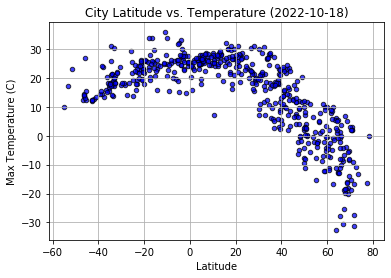

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate other graph properties
plt.title(f'City Latitude vs. Temperature (2022-10-18)')
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

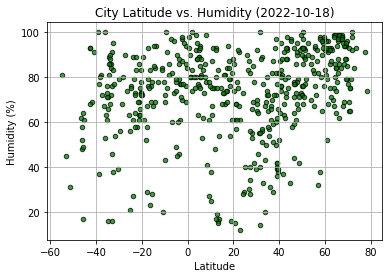

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

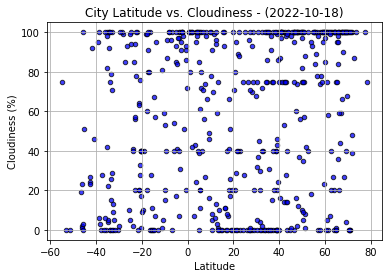

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness - (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

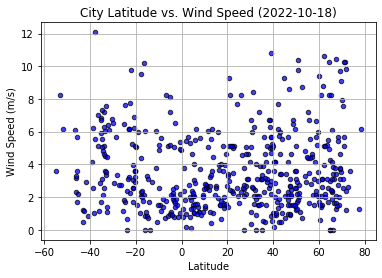

In [23]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
# Import linregress
from scipy.stats import linregress
import textwrap

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Clculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,dt
City_ID,,,,,,,,,
1,busselton,-33.6500,115.3333,13.60,84,79,4.51,AU,1667766643
2,rikitea,-23.1203,-134.9692,22.15,73,56,6.16,PF,1667766999
4,vaini,-21.2000,-175.2000,26.09,69,20,2.57,TO,1667767000
5,ulladulla,-35.3500,150.4667,16.44,76,98,1.68,AU,1667767000
10,ushuaia,-54.8000,-68.3000,9.79,81,75,3.60,AR,1667766644


###  Temperature vs. Latitude Linear Regression Plot

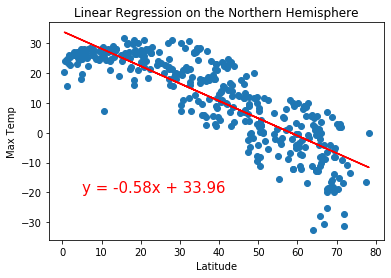

The p-value is: 0.000
The r-value is: -0.842


In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere',
                      'Max Temp',(5,-20))

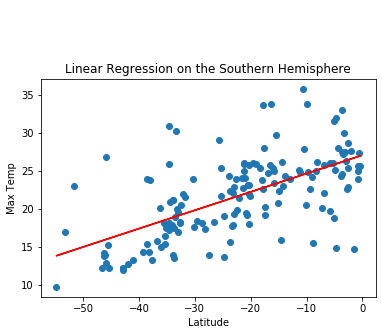

The p-value is: 0.000
The r-value is: 0.621


In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere',
                       'Max Temp',(-45,45))

**Discussion about the linear relationship:** The relationshipn in this Southern Hemisphere linear graft showed that, at latutide of 0, the max temp is higher above 25. But at latitude -50 mas temp becomes lower, below 15. However, looking at the Southern Hemisphere, it the opposite, the higher the longitude the higher the max teamp. The result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.



### Humidity vs. Latitude Linear Regression Plot

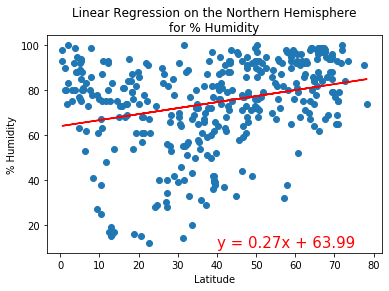

The p-value is: 0.000
The r-value is: 0.280


In [40]:
# t
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (40,10))

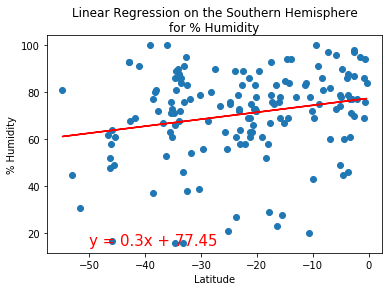

The p-value is: 0.006
The r-value is: 0.218


In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,15))

**Discussion about the linear relationship:** The Northern Hemisphere and Southern Hemisphere are showing no correlation between latitude and humidity.



### Cloudiness vs. Latitude Linear Regression Plot

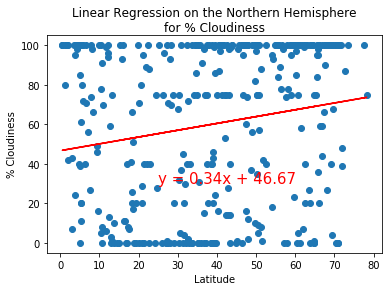

The p-value is: 0.001
The r-value is: 0.181


In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

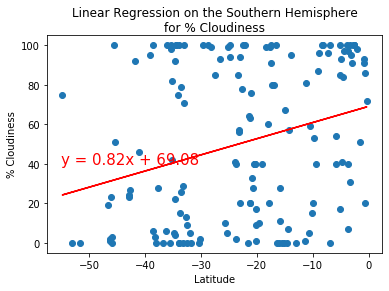

The p-value is: 0.000
The r-value is: 0.285


In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (-55,40))

**Discussion about the linear relationship:** Looking at the cloudiness and latitude relationship, again you will see higher cloudiness at latitude -10 to 0 (the closer to the equator). This means that, the higher the latitude the more cloudiness . The result reveals no correlation between latitude and cloudiness.



### Wind Speed vs. Latitude Linear Regression Plot

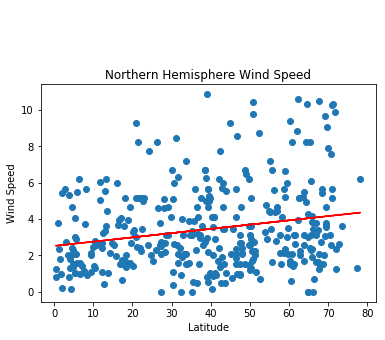

The p-value is: 0.000
The r-value is: 0.213


In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Northern Hemisphere Wind Speed',
                       'Wind Speed',
                       (50,15))

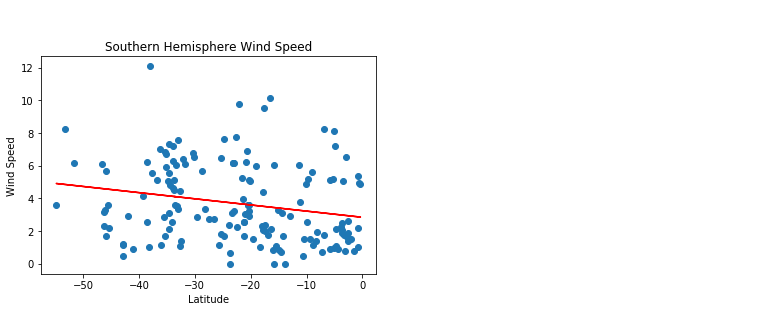

The p-value is: 0.007
The r-value is: -0.215


In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Southern Hemisphere Wind Speed',
                       'Wind Speed',
                       (50,15))

**Discussion about the linear relationship:** The Southern Hemisphere Wind Speed and the Northern Hemisphere Wind Speed are quit interesting because both going to different directions. Looking at the Northern Hemisphere Wind Speed when latitude is high, then wind speed is lower but the Southern Hemisphere Wind Speed when latitude is wind speed is high too. The result reveals no correlation between latitude and wind speed.